### Added results section

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
comp_df_orig_rew = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/result_frames/performance/comp_df_orig_rew.pkl")
comp_df_cal_eqodds = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/result_frames/performance/comp_df_cal_eqodds.pkl")

results_df = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/result_frames/performance/results_df.pkl")
results_df_eqodds_cor = pd.read_pickle("C:/Users/Hauke/OneDrive - ucp.pt/04_Thesis/00_GitHub/Thesis/data/interim/result_frames/performance/results_df_eqodds_cor.pkl")

In [3]:
race_score_df = pd.merge(comp_df_orig_rew, comp_df_cal_eqodds, left_index=True, right_index=True)
fairness_performance_df = pd.merge(results_df, results_df_eqodds_cor, left_index=True, right_index=True)

fairness_performance_df.columns = race_score_df.columns = ["Initial Model", "Reweighing", "Calibrated Equalized Odds", "Correlation Removal"]

In [4]:
fairness_performance_df

,Initial Model,Reweighing,Calibrated Equalized Odds,Correlation Removal
accuracy,0.904894,0.902493,0.730104,0.905029
precision,0.878313,0.875046,0.689267,0.879221
recall,0.970316,0.970296,0.972828,0.969263
f1,0.922025,0.920212,0.806859,0.922049
roc_auc,0.943971,0.941941,NA,NA
tpr_disparity,0.987803,0.994071,0.950935,0.95625
fpr_disparity,0.955315,0.998854,0.428591,0.798058
tnr_disparity,1.010275,1.000271,2.232092,1.047766
fnr_disparity,1.419652,1.198473,3.250273,2.668029


In [5]:
race_score_df

,Initial Model,Reweighing,Calibrated Equalized Odds,Correlation Removal
Accuracy White,0.908695,0.906631,0.715691,0.908591
Precision White,0.887436,0.885204,0.68482,0.885405
Recall White,0.971756,0.970995,0.978661,0.974442
F1 Score White,0.927684,0.926117,0.805788,0.927793
AUC White,0.941588,0.940123,NA,NA
Accuracy Black,0.884210,0.879976,0.808528,0.885646
Precision Black,0.816840,0.807631,0.725076,0.835114
Recall Black,0.959903,0.965238,0.930644,0.931811
F1 Score Black,0.882612,0.879429,0.815099,0.880816
AUC Black,0.947980,0.947376,NA,NA


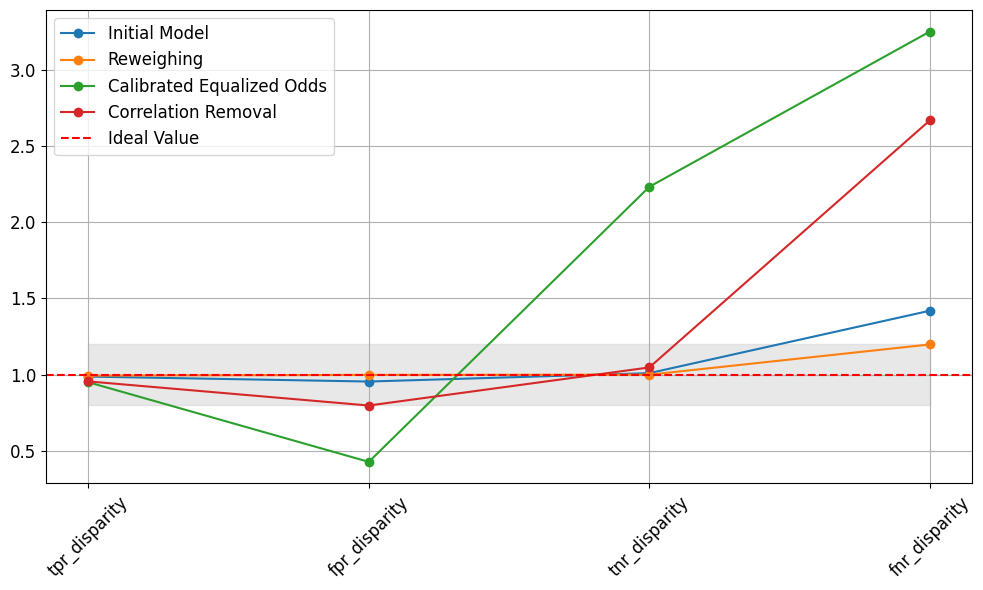

In [17]:
data = {
    'KPI': ['tpr_disparity', 'fpr_disparity', 'tnr_disparity', 'fnr_disparity'],
    fairness_performance_df.columns[0]: [fairness_performance_df[fairness_performance_df.columns[0]][5], fairness_performance_df[fairness_performance_df.columns[0]][6], fairness_performance_df[fairness_performance_df.columns[0]][7], fairness_performance_df[fairness_performance_df.columns[0]][8]],
    fairness_performance_df.columns[1]: [fairness_performance_df[fairness_performance_df.columns[1]][5], fairness_performance_df[fairness_performance_df.columns[1]][6], fairness_performance_df[fairness_performance_df.columns[1]][7], fairness_performance_df[fairness_performance_df.columns[1]][8]],
    fairness_performance_df.columns[2]: [fairness_performance_df[fairness_performance_df.columns[2]][5], fairness_performance_df[fairness_performance_df.columns[2]][6], fairness_performance_df[fairness_performance_df.columns[2]][7], fairness_performance_df[fairness_performance_df.columns[2]][8]],   
    fairness_performance_df.columns[3]: [fairness_performance_df[fairness_performance_df.columns[3]][5], fairness_performance_df[fairness_performance_df.columns[3]][6], fairness_performance_df[fairness_performance_df.columns[3]][7], fairness_performance_df[fairness_performance_df.columns[3]][8]]
}

df = pd.DataFrame(data)
metrics = df['KPI']
iteration1_values = df[fairness_performance_df.columns[0]]
iteration2_values = df[fairness_performance_df.columns[1]]
iteration3_values = df[fairness_performance_df.columns[2]]
iteration4_values = df[fairness_performance_df.columns[3]]

plt.figure(figsize=(10, 6))
plt.plot(metrics, iteration1_values, marker='o', label=fairness_performance_df.columns[0])
plt.plot(metrics, iteration2_values, marker='o', label=fairness_performance_df.columns[1])
plt.plot(metrics, iteration3_values, marker='o', label=fairness_performance_df.columns[2])
plt.plot(metrics, iteration4_values, marker='o', label=fairness_performance_df.columns[3])

plt.axhline(y=1, color='r', linestyle='--', label='Ideal Value')

plt.xlabel('')
plt.ylabel('')
# plt.title('Comparison of Model Iterations')

plt.xticks(rotation=45, fontsize = 12)
plt.yticks(fontsize = 12)
# mark the area between 0.8 and 1.2 on the y axis in a light gray
plt.fill_between([0, 3], 0.8, 1.2, color='lightgray', alpha=0.5)

plt.legend(fontsize = 12)

plt.grid(True)
plt.tight_layout()
plt.show()

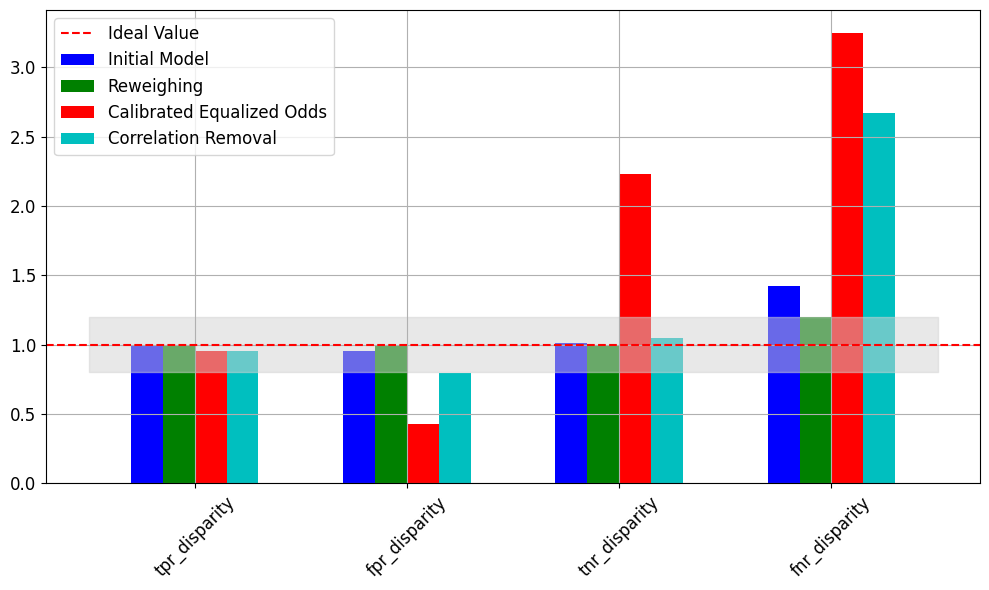

In [18]:
# Number of bars (features) to display
num_bars = 4

# Create an array with the positions of each bar
bar_positions = np.arange(num_bars)

# Set the width of each bar
bar_width = 0.15

# Create the figure
plt.figure(figsize=(10, 6))

# Plot the bars for each iteration, adjusting the position for each one
plt.bar(bar_positions - 3*bar_width/2, iteration1_values, color='b', label=fairness_performance_df.columns[0], width=bar_width)
plt.bar(bar_positions - bar_width/2, iteration2_values, color='g', label=fairness_performance_df.columns[1], width=bar_width)
plt.bar(bar_positions + bar_width/2, iteration3_values, color='r', label=fairness_performance_df.columns[2], width=bar_width)
plt.bar(bar_positions + 3*bar_width/2, iteration4_values, color='c', label=fairness_performance_df.columns[3], width=bar_width)

plt.axhline(y=1, color='r', linestyle='--', label='Ideal Value')

plt.xlabel('')
plt.ylabel('')
# plt.title('Comparison of Model Iterations')

plt.xticks(bar_positions, metrics, rotation=45, fontsize = 12)
plt.yticks(fontsize = 12)
# mark the area between 0.8 and 1.2 on the y axis in a light gray
plt.fill_between([-0.5, 3.5], 0.8, 1.2, color='lightgray', alpha=0.5)

plt.legend(fontsize = 12)

plt.grid(True)
plt.tight_layout()
plt.show()

In [7]:
fairness_performance_df_restructured = fairness_performance_df.iloc[:5]

In [8]:
race_score_df_2 = fairness_performance_df.iloc[5:]

In [9]:
fairness_performance_df_restructured

,Initial Model,Reweighing,Calibrated Equalized Odds,Correlation Removal
accuracy,0.904894,0.902493,0.730104,0.905029
precision,0.878313,0.875046,0.689267,0.879221
recall,0.970316,0.970296,0.972828,0.969263
f1,0.922025,0.920212,0.806859,0.922049
roc_auc,0.943971,0.941941,NA,NA


In [10]:
race_score_df

,Initial Model,Reweighing,Calibrated Equalized Odds,Correlation Removal
Accuracy White,0.908695,0.906631,0.715691,0.908591
Precision White,0.887436,0.885204,0.68482,0.885405
Recall White,0.971756,0.970995,0.978661,0.974442
F1 Score White,0.927684,0.926117,0.805788,0.927793
AUC White,0.941588,0.940123,NA,NA
Accuracy Black,0.884210,0.879976,0.808528,0.885646
Precision Black,0.816840,0.807631,0.725076,0.835114
Recall Black,0.959903,0.965238,0.930644,0.931811
F1 Score Black,0.882612,0.879429,0.815099,0.880816
AUC Black,0.947980,0.947376,NA,NA


In [11]:
race_score_df_2

,Initial Model,Reweighing,Calibrated Equalized Odds,Correlation Removal
tpr_disparity,0.987803,0.994071,0.950935,0.95625
fpr_disparity,0.955315,0.998854,0.428591,0.798058
tnr_disparity,1.010275,1.000271,2.232092,1.047766
fnr_disparity,1.419652,1.198473,3.250273,2.668029


In [12]:
fairness_performance_initial = pd.DataFrame(fairness_performance_df_restructured["Initial Model"])
fairness_performance_initial

,Initial Model
accuracy,0.904894
precision,0.878313
recall,0.970316
f1,0.922025
roc_auc,0.943971


In [13]:
race_score_initial = pd.DataFrame(race_score_df["Initial Model"])
race_score_initial

,Initial Model
Accuracy White,0.908695
Precision White,0.887436
Recall White,0.971756
F1 Score White,0.927684
AUC White,0.941588
Accuracy Black,0.884210
Precision Black,0.816840
Recall Black,0.959903
F1 Score Black,0.882612
AUC Black,0.947980


In [14]:
race_score_initial_2 = pd.DataFrame(race_score_df_2["Initial Model"])
race_score_initial_2

,Initial Model
tpr_disparity,0.987803
fpr_disparity,0.955315
tnr_disparity,1.010275
fnr_disparity,1.419652
